In [138]:
from models import scribbler 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
models=scribbler.Scribbler(4,3,32)

In [10]:
b=scribbler.ResidualBlock(32)

In [58]:
b=scribbler.UpsamplingBlock(4,4,3,2,1)

In [28]:
for num,module in enumerate(models.children()):
    print module

Sequential (
  (conv_1): Conv2d(4, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (norm_1): ReLU (inplace)
  (res_block_1): ResidualBlock (
    (resblock): Sequential (
      (conv_1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
      (norm_1): ReLU (inplace)
      (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    )
  )
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batch_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (norm_2): ReLU (inplace)
  (res_block_2): ResidualBlock (
    (resblock): Sequential (
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (norm_1): ReLU

In [73]:
import torch
from torch.autograd import Variable

test_var=torch.Tensor(1,4,128,128)
test_var=Variable(test_var)


seqblock=models._modules.items()
modules = seqblock[0][1]._modules.items()

In [74]:
inp = test_var
for num,name_module in enumerate(modules):
    name,module=name_module
    print name
    inp=module(inp)
    print inp.data.size()

conv_1
torch.Size([1, 32, 128, 128])
batch_1
torch.Size([1, 32, 128, 128])
norm_1
torch.Size([1, 32, 128, 128])
res_block_1
torch.Size([1, 32, 128, 128])
conv_2
torch.Size([1, 64, 64, 64])
batch_2
torch.Size([1, 64, 64, 64])
norm_2
torch.Size([1, 64, 64, 64])
res_block_2
torch.Size([1, 64, 64, 64])
conv_3
torch.Size([1, 128, 32, 32])
batch_3
torch.Size([1, 128, 32, 32])
norm_3
torch.Size([1, 128, 32, 32])
res_block_3
torch.Size([1, 128, 32, 32])
conv_4
torch.Size([1, 256, 16, 16])
batch_4
torch.Size([1, 256, 16, 16])
norm_4
torch.Size([1, 256, 16, 16])
res_block_4
torch.Size([1, 256, 16, 16])
res_block_5
torch.Size([1, 256, 16, 16])
res_block_6
torch.Size([1, 256, 16, 16])
res_block_7
torch.Size([1, 256, 16, 16])
res_block_8
torch.Size([1, 256, 16, 16])
upsampl_1
torch.Size([1, 128, 32, 32])
batch_5
torch.Size([1, 128, 32, 32])
norm_5
torch.Size([1, 128, 32, 32])
res_block_9
torch.Size([1, 128, 32, 32])
res_block_10
torch.Size([1, 128, 32, 32])
upsampl_2
torch.Size([1, 64, 64, 64])
bat

In [60]:
b(test_var).data.size()

torch.Size([1, 4, 2, 2])

In [66]:
import torch.nn as nn
est=nn.Conv2d(4,4,3,1,1)
ups =nn.UpsamplingBilinear2d(scale_factor=2)

In [67]:
ups(est(test_var)).data.size()


torch.Size([1, 4, 256, 256])

In [123]:
from models import discriminator

In [126]:
net_G = discriminator.Discriminator(4,32)

In [127]:
net_G(test_var).data.size()

torch.Size([1, 1, 6, 6])

In [134]:
class wrap_tensor(object):
    def __new__(self, tensor, use_gpu=0):
        
        if use_gpu:
            tensor = tensor.gpu()
        
        return Variable(tensor)


In [135]:
a=wrap_tensor(torch.Tensor(1,3,128,128))

In [136]:
a

Variable containing:
( 0 , 0 ,.,.) = 
1.00000e-02 *
  0.0734  2.6314  2.6171  ...   2.7655  2.9222  3.3236
 -0.1313  2.3974 -4.0965  ...   1.1133  0.3985  3.3907
 -1.2021  0.6348 -2.7736  ...   3.7271  1.6641 -3.3536
           ...             ⋱             ...          
  2.3712  1.3148 -0.8128  ...   3.3580  3.8041  0.5040
  3.5194 -1.7603 -3.4527  ...   3.0776  0.3298  2.6506
 -2.2066  3.7979  2.9514  ...   2.4176  2.1112  4.1416

( 0 , 1 ,.,.) = 
1.00000e-02 *
  0.2459 -2.9054 -1.1564  ...   0.8491 -1.0190  3.8864
 -3.8008 -1.5663  1.3573  ...  -1.9318  3.2158  2.4807
  3.6465  0.1448  2.5906  ...  -0.8185 -0.4555  2.0985
           ...             ⋱             ...          
  3.2122 -1.7488 -3.6171  ...   2.0084  3.0590 -0.7748
 -3.4111 -1.0479 -2.5168  ...  -0.3489 -2.3169  2.1007
 -3.3342 -0.0237 -2.6577  ...   3.2118  1.6310  1.6333

( 0 , 2 ,.,.) = 
1.00000e-02 *
 -2.5461  0.8362  1.4056  ...  -3.3384 -3.7399  1.1130
  1.6505 -0.8751  2.5447  ...  -3.8053  2.2040  3.8403
  2.

In [66]:
class toLAB(object):
    
    def __init__(self):
        self.space = 'LAB'
        
    def __call__(self, image ):
        lab_img = color.rgb2lab(np.array(img)/255.0)
        return lab_img
    
class toRGB(object):
    
    def __init__(self):
        self.space = 'RGB'
        
    def __call__(self, img):
        npimg = np.transpose(img.numpy(), (1, 2, 0))
        rgb_img = color.lab2rgb(np.array(npimg))
        return rgb_img
    
class toTensor(object):
    
    def __init__(self):
        self.space = 'RGB'
        
    def __call__(self, pic):
        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        return img
        

In [16]:
from skimage import color
from PIL import Image
import numpy as np

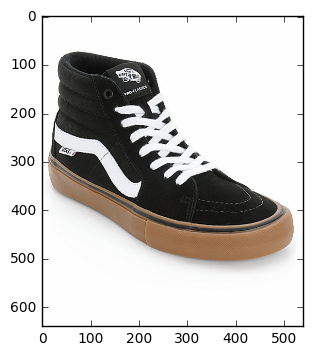

In [43]:
img=Image.open('test.jpg')

lab_img = color.rgb2lab(np.array(img)/255.0)
rgb_img = color.lab2rgb(lab_img)

plt.imshow(rgb_img)

In [57]:
tensorify=toTensor()

In [58]:
img = tensorify(lab_img)
npimg = np.transpose(img.numpy(), (1, 2, 0))


0.0

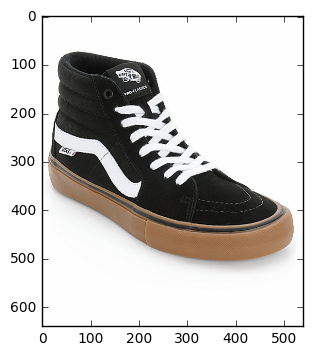

In [67]:
img=Image.open('test.jpg')

process=transforms.ToTensor()
labify=toLAB()
lab_img=labify(img)
lab_tensor=tensorify(lab_img)
rgbify=toRGB()
rgb_img=rgbify(lab_tensor)

plt.imshow(rgb_img)

In [74]:
np.min(lab_img[:,:,1])

-15.379660817319465

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

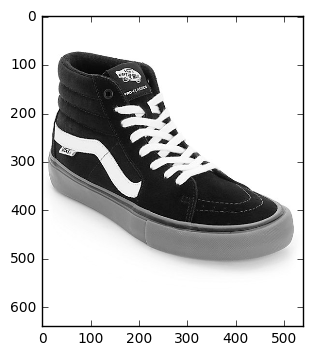

In [49]:
plt.imshow(lab_img[:,:,0]*255,cmap='gray')

In [4]:
import torch
import torchvision.transforms as transforms

In [27]:
from IPython.display import display

In [5]:
show_lab=transforms.Compose([toRGB(),transforms.ToPILImage()])

In [75]:
import torchvision.models as models

In [77]:
feat_model=models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/araj/.torch/models/vgg19-dcbb9e9d.pth
100.0%


In [125]:
feat_model=feat_model.double()

In [107]:
from torch.autograd import Variable
lab_var = Variable(lab_tensor.unsqueeze(0))
A,B,C=torch.chunk(lab_var,3,dim=1)

In [119]:
AAA=torch.cat((A,A,A),1)

In [121]:
AAA.mul(100)

Variable containing:
( 0 , 0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

( 0 , 1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

( 0 , 2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000

In [126]:
inp=AAA
for name,module in feat_model.features._modules.items():
    print module
    inp=module(inp)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU (inplace)
Conv2d(5

In [141]:
import visualize

In [143]:
visualize.make_dot

AttributeError: 'module' object has no attribute 'make_dot'

In [136]:
sys.path.append('.')